In [1]:
import numpy as np  # import required Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("California Wildfire Damage (1).csv")

In [3]:
df.head()


,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [5]:
df.info()  # basic info about data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [10]:
df['Date'] = pd.to_datetime(df['Date'])  #convert Date datatype in to date format

In [11]:
df['year'] = df['Date'].dt.year  #Extract year from Date table

In [14]:
df.info()  # after some modification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Incident_ID                           100 non-null    object        
 1   Date                                  100 non-null    datetime64[ns]
 2   Location                              100 non-null    object        
 3   Area_Burned (Acres)                   100 non-null    int64         
 4   Homes_Destroyed                       100 non-null    int64         
 5   Businesses_Destroyed                  100 non-null    int64         
 6   Vehicles_Damaged                      100 non-null    int64         
 7   Injuries                              100 non-null    int64         
 8   Fatalities                            100 non-null    int64         
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 10  Cau

In [ ]:
df.head()  # print top 5 raw of data set

# Data visvulization and find meaning full insights from this datasets

# Query1: What is the total area burned by wildfires each year?


In [16]:
total_area_burned_per_year = df.groupby('year')['Area_Burned (Acres)'].sum().reset_index()


In [17]:
print(total_area_burned_per_year)

   year  Area_Burned (Acres)
0  2014               292258
1  2015               335017
2  2016               221408
3  2017                67059
4  2018               286662
5  2019               204166
6  2020               210763
7  2021               347909
8  2022               295972
9  2023               391932


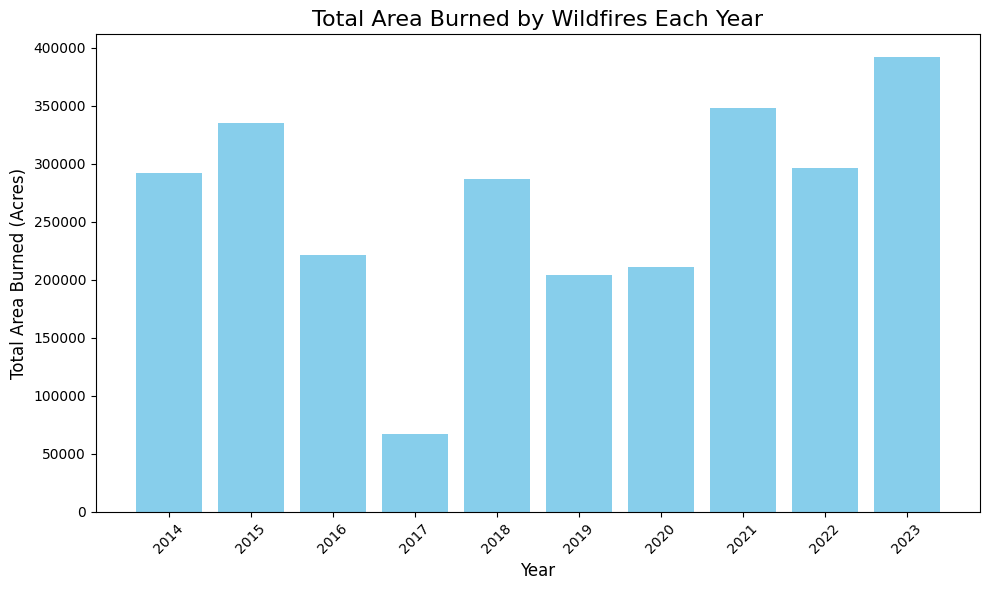

In [25]:
# Plot the chart
full_years_range = range(total_area_burned_per_year['year'].min(), total_area_burned_per_year['year'].max() + 1)

plt.figure(figsize=(10, 6))
plt.bar(total_area_burned_per_year['year'], total_area_burned_per_year['Area_Burned (Acres)'], color='skyblue')
plt.title('Total Area Burned by Wildfires Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Area Burned (Acres)', fontsize=12)
plt.xticks(full_years_range, rotation=45, fontsize=10)  # Apply the range here
plt.tight_layout()

# Show the plot
plt.show()

# Query2: Is there a correlation between the area burned and the financial loss, homes destroyed, businesses destroyed, etc.?



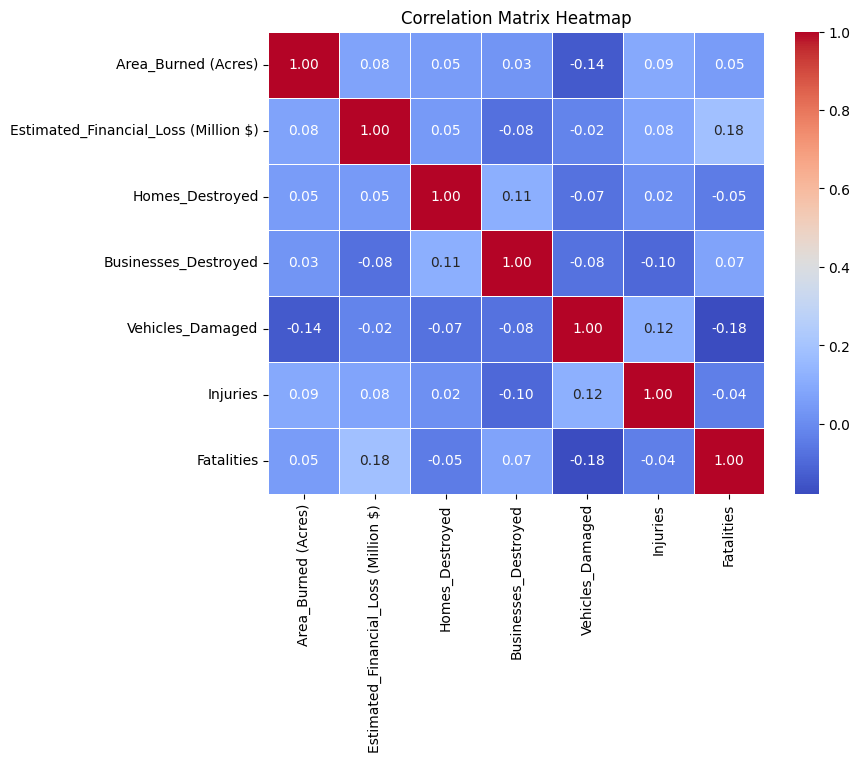

In [27]:


# Compute correlation matrix
correlation_matrix = df[['Area_Burned (Acres)', 'Estimated_Financial_Loss (Million $)', 
                         'Homes_Destroyed', 'Businesses_Destroyed', 
                         'Vehicles_Damaged', 'Injuries', 'Fatalities']].corr()


# Visualizing the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Quer3: What were the top 5 wildfires with the highest financial loss?


In [28]:
# Sort by Estimated Financial Loss in descending order
top_5_wildfires = df.sort_values(by="Estimated_Financial_Loss (Million $)", ascending=False).head(5)


In [29]:
# Display the top 5 records
print(top_5_wildfires[['Incident_ID', 'Date', 'Location', 'Estimated_Financial_Loss (Million $)']])

   Incident_ID       Date              Location  \
24     INC1024 2019-02-16          Butte County   
55     INC1055 2019-04-05         Shasta County   
51     INC1051 2017-06-13      Riverside County   
93     INC1093 2018-10-15  Santa Barbara County   
91     INC1091 2020-09-28         Orange County   

    Estimated_Financial_Loss (Million $)  
24                               4866.99  
55                               4829.70  
51                               4643.14  
93                               4508.65  
91                               4488.62  


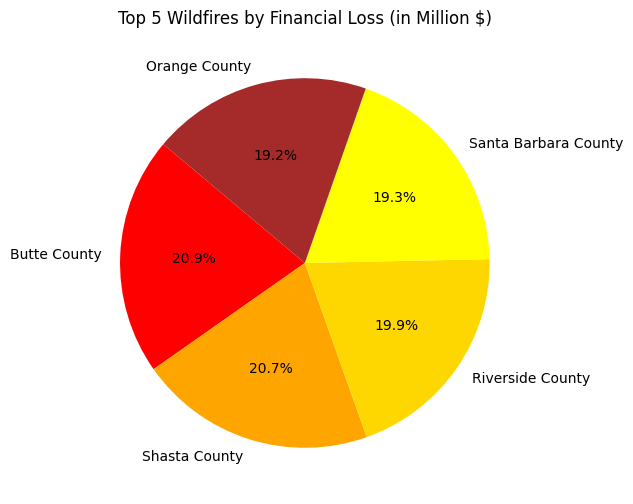

In [30]:
# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(top_5_wildfires["Estimated_Financial_Loss (Million $)"], 
        labels=top_5_wildfires["Location"], 
        autopct="%1.1f%%", 
        startangle=140, 
        colors=["red", "orange", "gold", "yellow", "brown"])

# Title
plt.title("Top 5 Wildfires by Financial Loss (in Million $)")
plt.show()

# Query4: Which locations had the highest number of injuries and fatalities?


In [43]:
location_summary = df.groupby('Location')[['Injuries', 'Fatalities']].sum()

# Sort the locations by 'Injuries' and 'Fatalities' to get the highest ones
highest_injuries = location_summary.sort_values(by='Injuries', ascending=False).head(1)
highest_fatalities = location_summary.sort_values(by='Fatalities', ascending=False).head(1)

# Display the results
print("Location with highest number of injuries:")
print(highest_injuries)

print("\nLocation with highest number of fatalities:")
print(highest_fatalities)

Location with highest number of injuries:
                  Injuries  Fatalities
Location                              
Mendocino County       687         122

Location with highest number of fatalities:
               Injuries  Fatalities
Location                           
Shasta County       611         146


In [48]:
print(location_summary.sort_values(by='Injuries',ascending=False))

                      Injuries  Fatalities
Location                                  
Mendocino County           687         122
Shasta County              611         146
Napa Valley                512          90
Sonoma County              454         113
Butte County               432         100
San Diego County           395         115
Orange County              305         107
Los Angeles County         301          54
Santa Barbara County       260          74
Riverside County           247          72


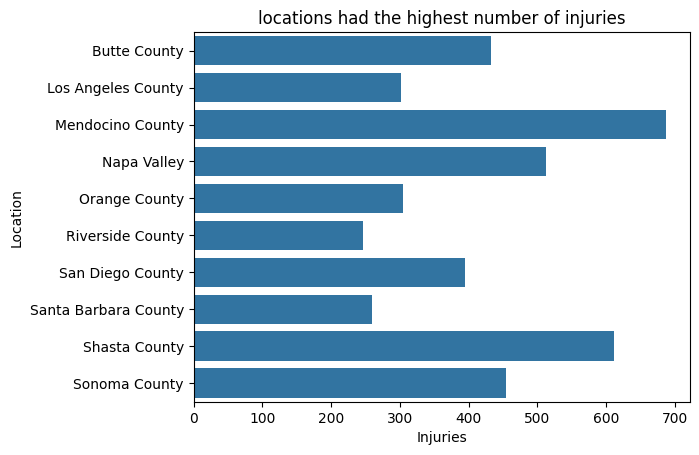

In [57]:

sns.barplot(x='Injuries' ,y='Location',data= location_summary)
plt.title("locations had the highest number of injuries")
plt.show()

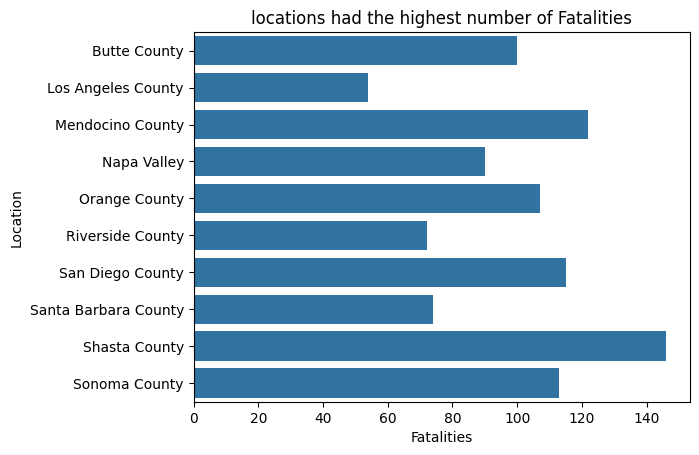

In [58]:
sns.barplot(x='Fatalities' ,y='Location',data= location_summary)
plt.title("locations had the highest number of Fatalities")
plt.show()

# Query5: How often do wildfires occur in different areas?


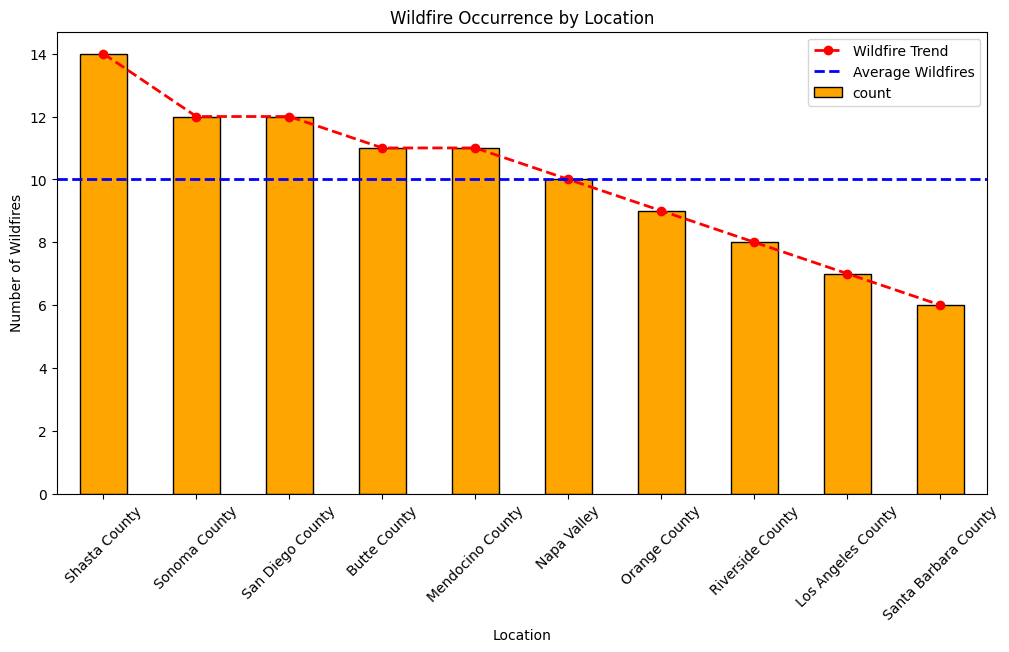

In [6]:

# Count occurrences of wildfires in each location
fire_counts = df['Location'].value_counts()

# Plot the wildfire frequency in different areas
plt.figure(figsize=(12, 6))
bars = fire_counts.plot(kind='bar', color='orange', edgecolor='black')

# Overlay a line chart on top of the bars
plt.plot(fire_counts.values, color='red', marker='o', linestyle='dashed', linewidth=2, markersize=6, label="Wildfire Trend")

# Add a horizontal line at the average wildfire frequency
plt.axhline(y=fire_counts.mean(), color='blue', linestyle='--', linewidth=2, label="Average Wildfires")

# Labels and Title
plt.title("Wildfire Occurrence by Location")
plt.xlabel("Location")
plt.ylabel("Number of Wildfires")
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()


# Query6: Is there a pattern or relationship between fatalities and the area burned?


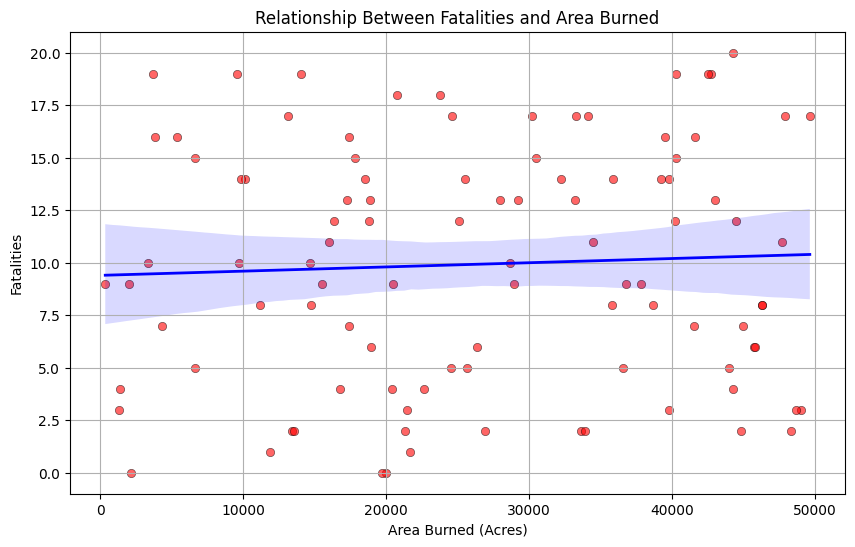

Correlation between Fatalities and Area Burned: 0.05


In [7]:


# Scatter plot: Fatalities vs. Area Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Area_Burned (Acres)"], y=df["Fatalities"], color="red", alpha=0.6, edgecolor="black")

# Trend line (regression line)
sns.regplot(x=df["Area_Burned (Acres)"], y=df["Fatalities"], scatter=False, color="blue", line_kws={"linewidth": 2})

# Labels and title
plt.title("Relationship Between Fatalities and Area Burned")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Fatalities")
plt.grid(True)
plt.show()

# Calculate correlation
correlation = df["Area_Burned (Acres)"].corr(df["Fatalities"])
print(f"Correlation between Fatalities and Area Burned: {correlation:.2f}")


# Pattern or Relationship Between Fatalities and Area Burned:
#  1. The correlation coefficient is 0.05, indicating a very weak or no correlation between the number of fatalities and the area burned.
#  2. The blue regression line is almost flat, meaning that increasing the burned area does not significantly affect the number of fatalities.
#  3. The data points are widely scattered, showing no clear trend or strong relationship.

# Query7: What is the yearly distribution of homes destroyed, businesses destroyed, vehicles damaged, and fatalities?


<Figure size 1600x600 with 0 Axes>

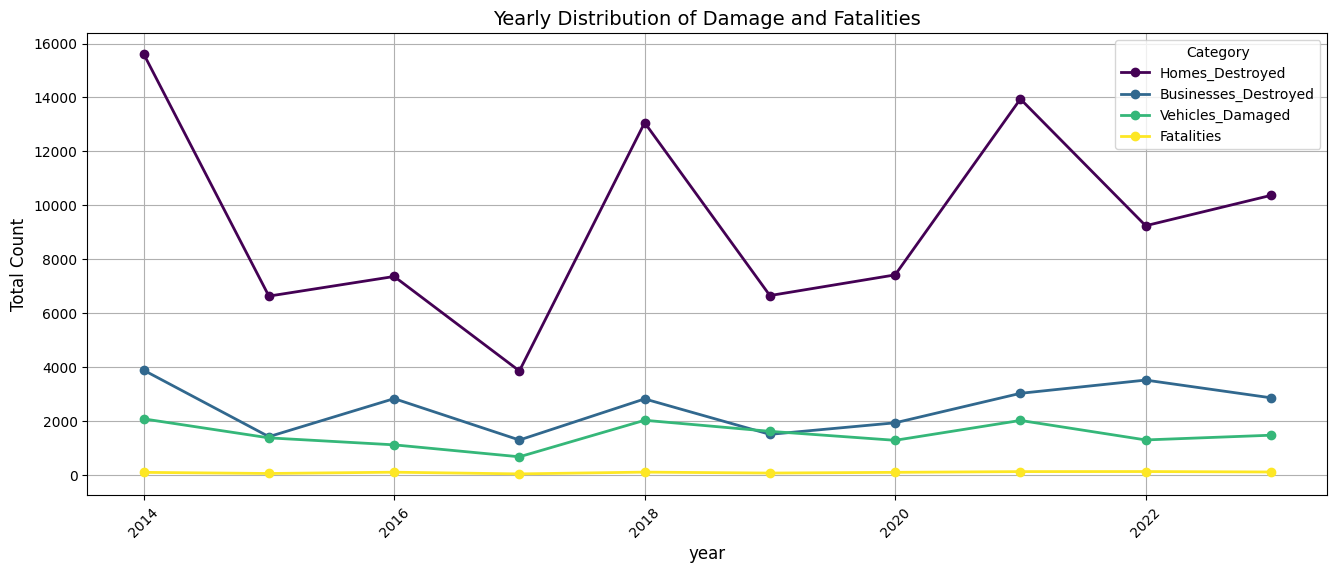

In [17]:


# Group by year and sum relevant columns
yearly_data = df.groupby("year")[["Homes_Destroyed", "Businesses_Destroyed", "Vehicles_Damaged", "Fatalities"]].sum()

# Increase graph width
plt.figure(figsize=(16, 6))  # Increased width (16 instead of 12)

# Plot yearly trends
yearly_data.plot(kind="line", marker="o", colormap="viridis", linewidth=2, figsize=(16, 6))  

# Labels and Title
plt.title("Yearly Distribution of Damage and Fatalities", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Category", fontsize=10)
plt.grid(True)

# Show plot
plt.show()


# The line chart shows trends over the years for the following categories:

# Observations:
# 1. Homes Destroyed (Purple Line)

#     a) Highest in 2014, 2018, and 2020 with peaks above 14,000.
#     b) Sharp declines in some years but increases again in later years.
#     c) Overall, it shows significant fluctuations.
# 2. Businesses Destroyed (Green Line)
#     a)Generally much lower than homes destroyed.
#     b)Peaks in 2016, 2018, and 2021, but the numbers remain below 4,000.

# 3. Vehicles Damaged (Blue Line)
#     a)Slightly higher than businesses destroyed.
#     b)Increases gradually over the years, peaking around 2021.
# 4. Fatalities (Yellow Line)
#     a)The lowest of all categories.
#     b)Remains fairly consistent across the years with slight variations.


# Query8: How do homes, businesses, and vehicles damaged correlate with the estimated financial loss?


# Query8: How do homes, businesses, and vehicles damaged correlate with the estimated financial loss?

Correlation Matrix:
                                      Homes_Destroyed  Businesses_Destroyed  \
Homes_Destroyed                              1.000000              0.113493   
Businesses_Destroyed                         0.113493              1.000000   
Vehicles_Damaged                            -0.073115             -0.075566   
Estimated_Financial_Loss (Million $)         0.046645             -0.077990   

                                      Vehicles_Damaged  \
Homes_Destroyed                              -0.073115   
Businesses_Destroyed                         -0.075566   
Vehicles_Damaged                              1.000000   
Estimated_Financial_Loss (Million $)         -0.024450   

                                      Estimated_Financial_Loss (Million $)  
Homes_Destroyed                                                   0.046645  
Businesses_Destroyed                                             -0.077990  
Vehicles_Damaged                                              

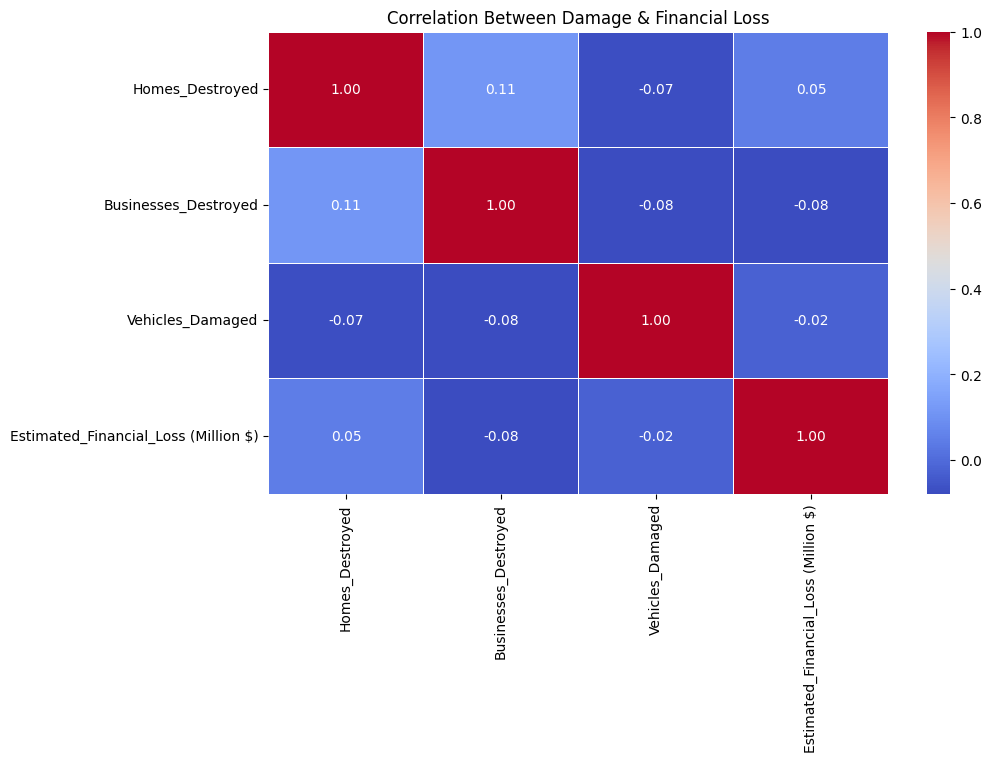

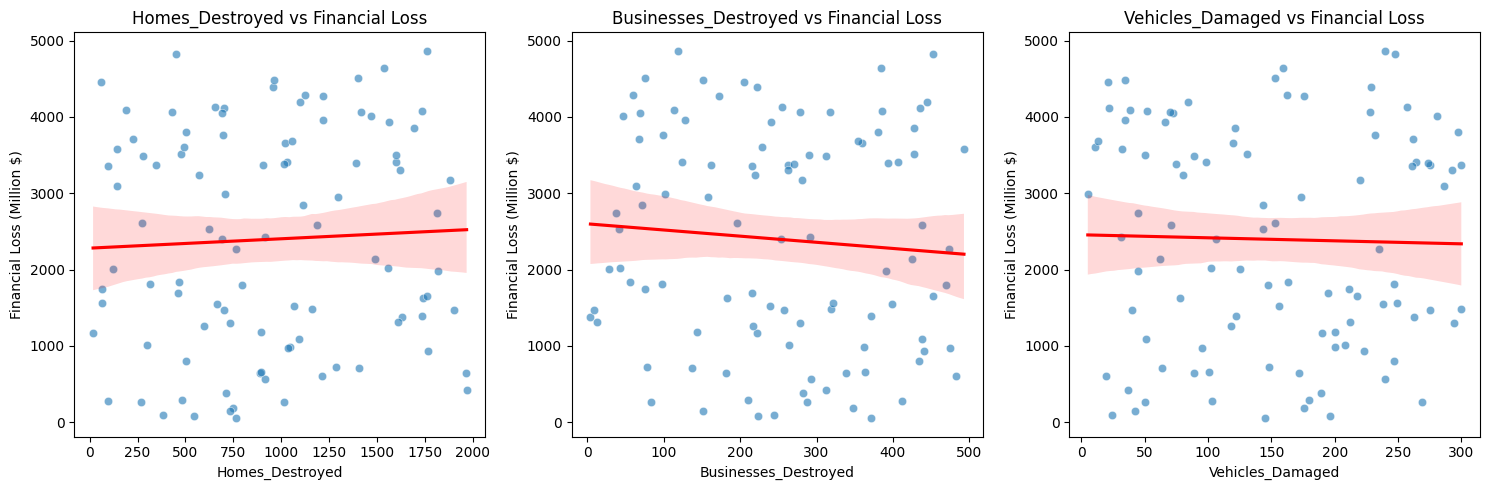

In [18]:


# Selecting relevant columns
columns_of_interest = ["Homes_Destroyed", "Businesses_Destroyed", "Vehicles_Damaged", "Estimated_Financial_Loss (Million $)"]
correlation_matrix = df[columns_of_interest].corr()

# Display correlation values
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap for correlation visualization
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Damage & Financial Loss")
plt.show()

# Scatter plots for deeper analysis
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns_of_interest[:-1], 1):  # Skip last column (financial loss)
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df["Estimated_Financial_Loss (Million $)"], alpha=0.6)
    sns.regplot(x=df[col], y=df["Estimated_Financial_Loss (Million $)"], scatter=False, color="red")
    plt.title(f"{col} vs Financial Loss")
    plt.xlabel(col)
    plt.ylabel("Financial Loss (Million $)")

plt.tight_layout()
plt.show()


# Correlation Between Damage & Financial Loss
# The heatmap provides correlation values between different types of damages and estimated financial loss.

# Key Observations:
# 1. Homes Destroyed vs. Financial Loss:

#  a)Correlation: 0.05 (Weak positive correlation)
#  b)This suggests that the number of homes destroyed has a very minimal impact on financial loss.
# 2. Businesses Destroyed vs. Financial Loss:

#  a)Correlation: -0.08 (Weak negative correlation)
#  b)Indicates that financial loss does not strongly depend on the number of businesses destroyed.
# 3. Vehicles Damaged vs. Financial Loss:

#  a) Correlation: -0.02 (Negligible correlation)
#  b)Suggests that the number of vehicles damaged does not contribute significantly to financial loss.
# Overall Correlation Insight:

# a) All correlation values are very low, meaning there is no strong relationship between financial loss and the number of homes, businesses, or vehicles damaged.
# b) Other factors (e.g., property value, insurance coverage, and infrastructure damage) might have a more significant impact on financial loss.

# Query9: What is the trend in the number of injuries and fatalities over the years?


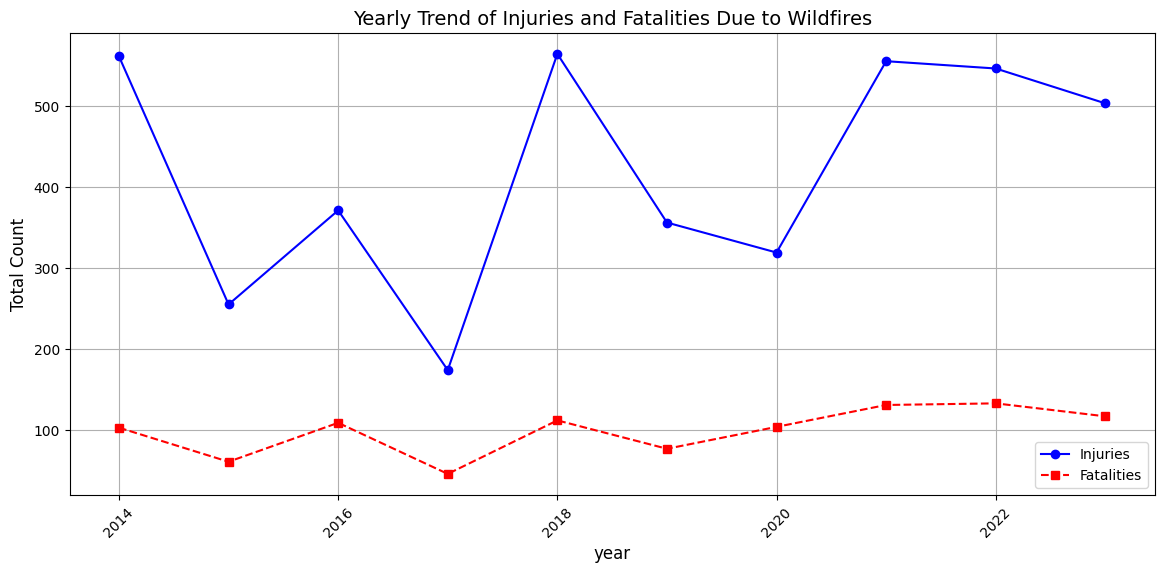

In [19]:


# Group by year and sum injuries and fatalities
yearly_trend = df.groupby("year")[["Injuries", "Fatalities"]].sum()

# Increase figure width
plt.figure(figsize=(14, 6))

# Plot trends for Injuries and Fatalities
plt.plot(yearly_trend.index, yearly_trend["Injuries"], marker="o", linestyle="-", label="Injuries", color="blue")
plt.plot(yearly_trend.index, yearly_trend["Fatalities"], marker="s", linestyle="--", label="Fatalities", color="red")

# Labels and Title
plt.title("Yearly Trend of Injuries and Fatalities Due to Wildfires", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Key Observations:
# 1. Injuries (Blue Line)
# a) There is significant fluctuation in the number of injuries over the years.
# b) The highest spikes occurred around 2014 and 2018, showing peaks of over 500 injuries.
# c) A decline was observed after 2018, but injuries remained relatively high in 2021 and 2022.

# Fatalities (Red Line)
# a) The number of fatalities has remained relatively stable, with small increases over time.
# b)Peaks can be seen around 2015, 2018, and 2021, but the overall increase is not as sharp as injuries.
# General Trend:

# a)Injuries show high variation over the years, with some years seeing large spikes.
# b)Fatalities are more gradual and stable, with minor increases over time.

# Conclusion Summary

# Query1: What is the total area burned by wildfires each year?
# The total area burned by wildfires changes each year, with the highest in 2015, 2021, and 2023.

# Query2: Is there a correlation between the area burned and the financial loss, homes destroyed, businesses destroyed, etc.?
# The correlation matrix shows a weak relationship between Area_Burned and financial loss, homes, and businesses destroyed. Estimated_Financial_Loss has a slight correlation with Fatalities. Vehicles_Damaged has a weak negative correlation with most variables. Other factors likely influence fire damage more than just the burned area.


# Query3: What were the top 5 wildfires with the highest financial loss?
# The top 5 wildfires with the highest financial loss, as shown in the pie chart, are:

#   1 Butte County - 20.9%
#   2 Shasta County - 20.7%
#   3 Riverside County - 19.9%
#   4 Santa Barbara County - 19.3%
#   5Orange County - 19.2%
# These counties experienced the most significant financial losses due to wildfires.


# Query4: Which locations had the highest number of injuries and fatalities?
# Locations with the Highest Number of Injuries:
#    1. Mendocino County (Highest)
#    2. Shasta County
#    3. Napa Valley
#    4. Sonoma County
#    5. Butte County
# Locations with the Highest Number of Fatalities:
#    1. Shasta County (Highest)
#    2. Butte County
#    3. Mendocino County
#    4. San Diego County
#    5. Sonoma County
# These locations experienced the most severe wildfire impacts in terms of injuries and fatalities. Let me know if you need further analysis!

# Query5: How often do wildfires occur in different areas?

# Most Frequent Wildfires:

#   1. Shasta County (Highest, around 14 wildfires)
#   2. Sonoma County (12 wildfires)
#   3. San Diego County (12 wildfires)
#   4. Butte County (11 wildfires)
#   5. Mendocino County (Around 11 wildfires)
# Moderate Wildfire Occurrence:

#   1. Napa Valley (10 wildfires)
#   2. Orange County (9 wildfires)
#   3. Riverside County (8 wildfires)

# Lowest Wildfire Occurrence:

#   1. Los Angeles County (7 wildfires)
#   2. Santa Barbara County (6 wildfires, lowest in the dataset)
# The red dashed trendline shows a decreasing wildfire occurrence pattern, and the blue dashed line represents the average number of wildfires, which seems to be around 10.

# Query6: Is there a pattern or relationship between fatalities and the area burned?
# Conclusion:
# The number of fatalities does not strongly depend on the area burned.
# Other factors (e.g., population density, evacuation measures, fire intensity) might influence fatalities more than just the area burned.

# Query7: What is the yearly distribution of homes destroyed, businesses destroyed, vehicles damaged, and fatalities?
# Conclusion:
# a) 2014, 2018, and 2020 had the highest destruction of homes.
# b) Businesses and vehicles follow a similar pattern with peaks in major wildfire years.
# c) Fatalities remain relatively stable compared to property damage.
# Query8: How do homes, businesses, and vehicles damaged correlate with the estimated financial loss?
# Conclusion:
#  1. The destruction of homes, businesses, and vehicles does not strongly determine financial loss.
#  2. Other economic factors might play a larger role in estimating financial damage.

# Query9: What is the trend in the number of injuries and fatalities over the years?
# Conclusion:
# a) Injuries exhibit a fluctuating pattern with multiple peaks, indicating wildfire severity differences each year.
# b) Fatalities remain more stable, with a slight upward trend in recent years.
# c) This trend suggests that while fire incidents are causing fluctuating injuries, fatalities are not increasing drastically.

